In [5]:
import numpy as np
from pathlib import Path
import  matplotlib.pyplot as plt
import child_mind_institute_detect_sleep_states.data.comp_dataset as c_data
path_root =Path("../output/prepare_data/train/robust_scaler/")
df_event = c_data.get_event_df("train")

In [6]:
#s_id = "0dee4fda51c3"
s_id = "1b92be89db4c"
line_w = 2
df_true = df_event.query("series_id == @s_id")
df_onset = df_true.query("event == 'onset'")
df_wakeup = df_true.query("event == 'wakeup'")

In [7]:
path_data = path_root / s_id
path_file = path_data / "anglez_lag_diff_abs_cumsum.npy"#_cumsum.npy"
arr = np.load(path_file)
#plt.plot(np.cumsum(arr))
arr[-1]

1.4062918

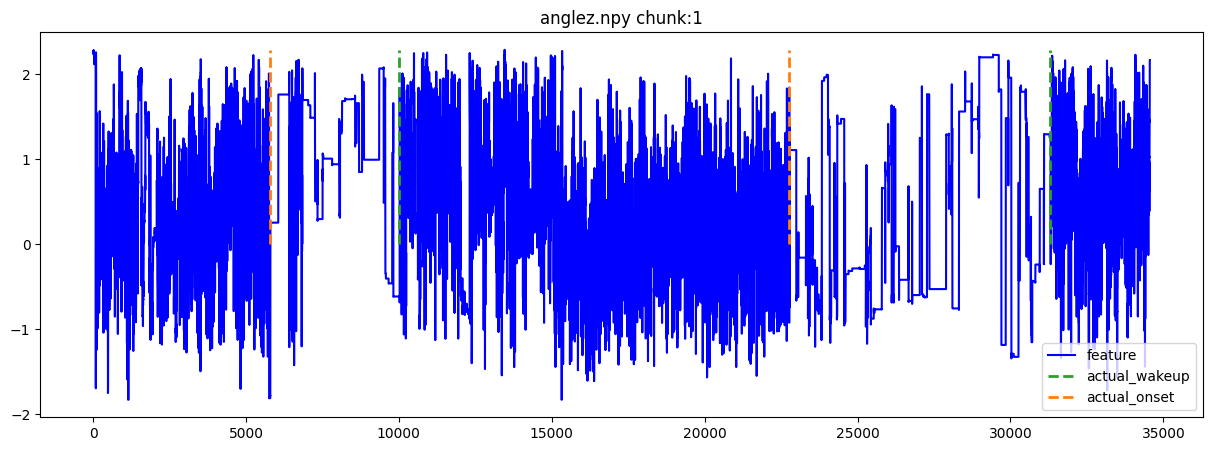

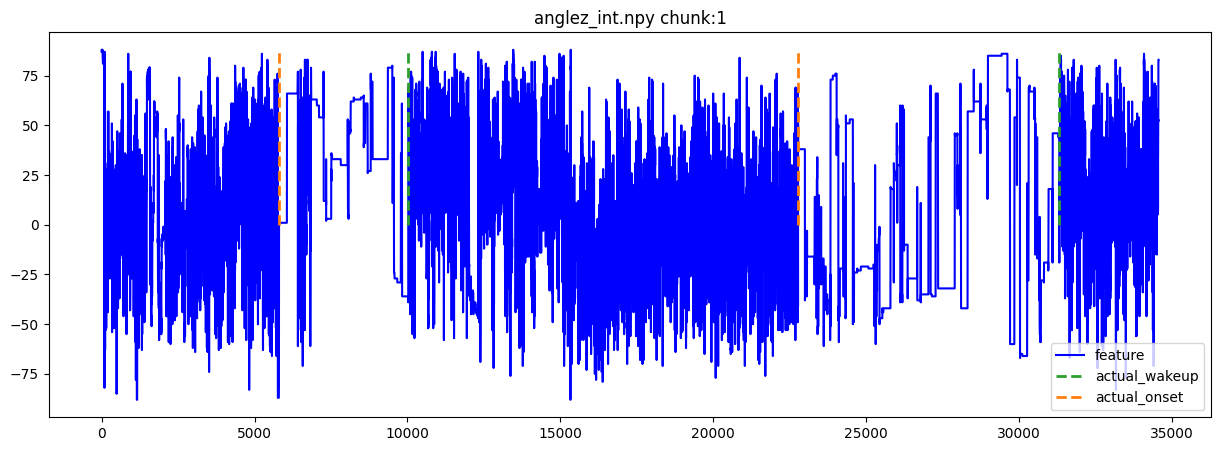

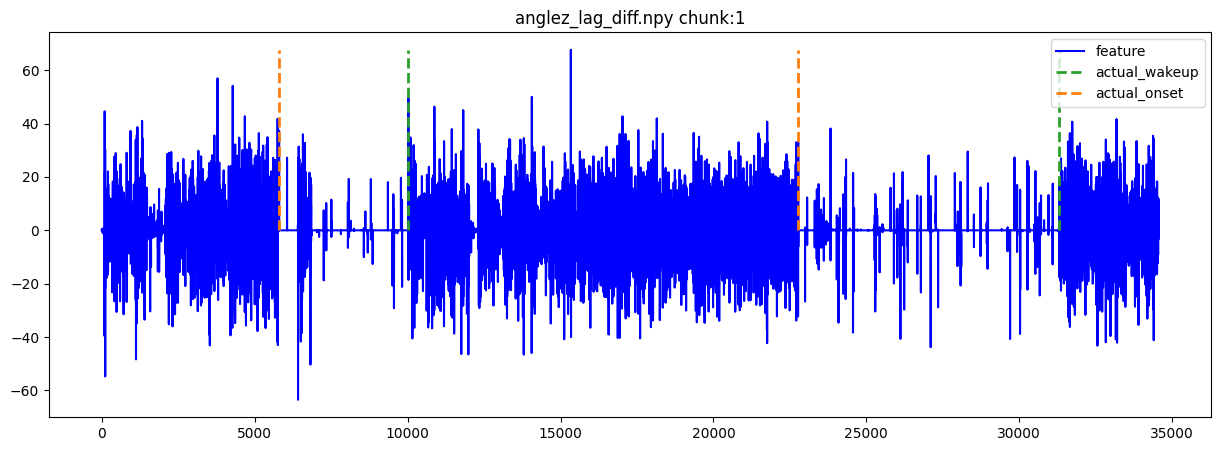

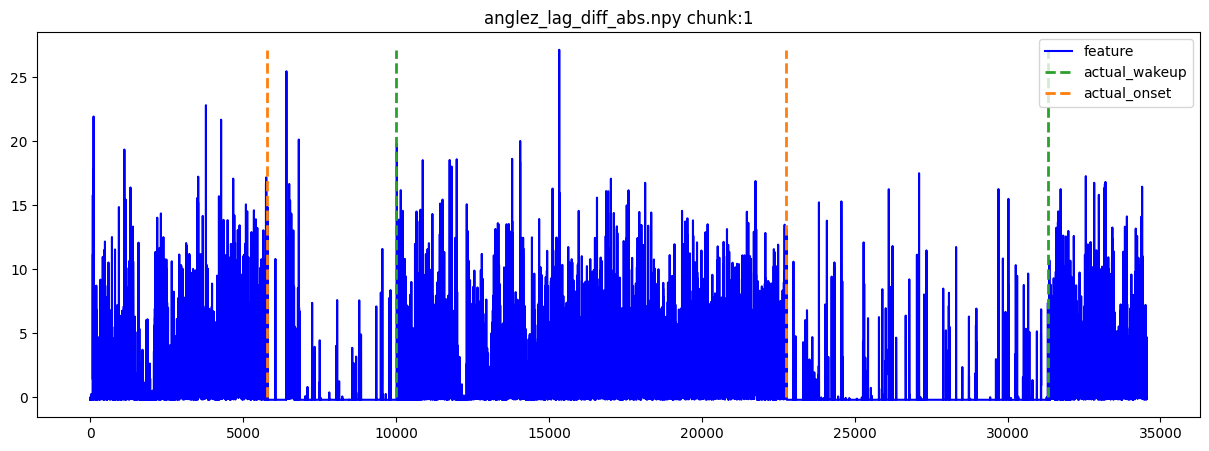

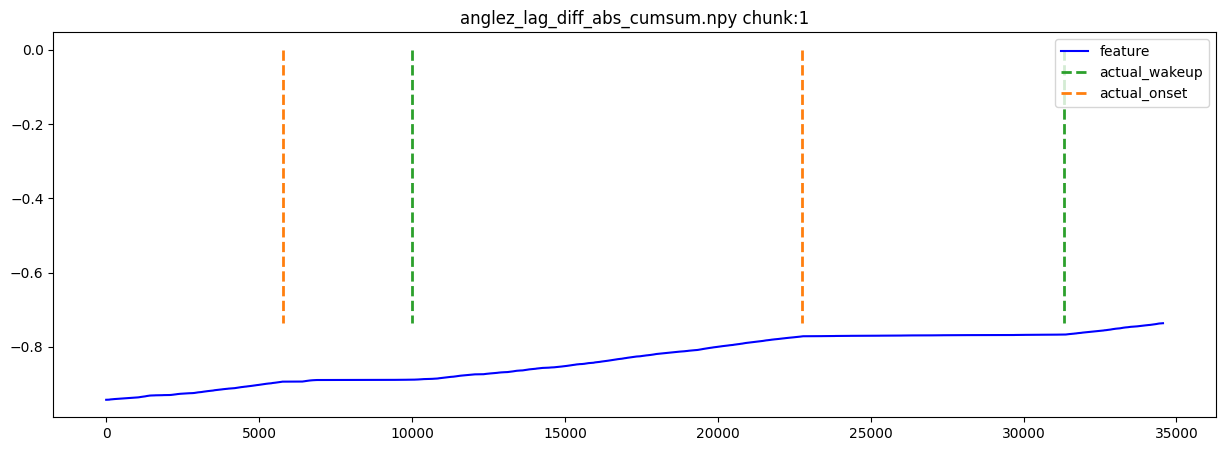

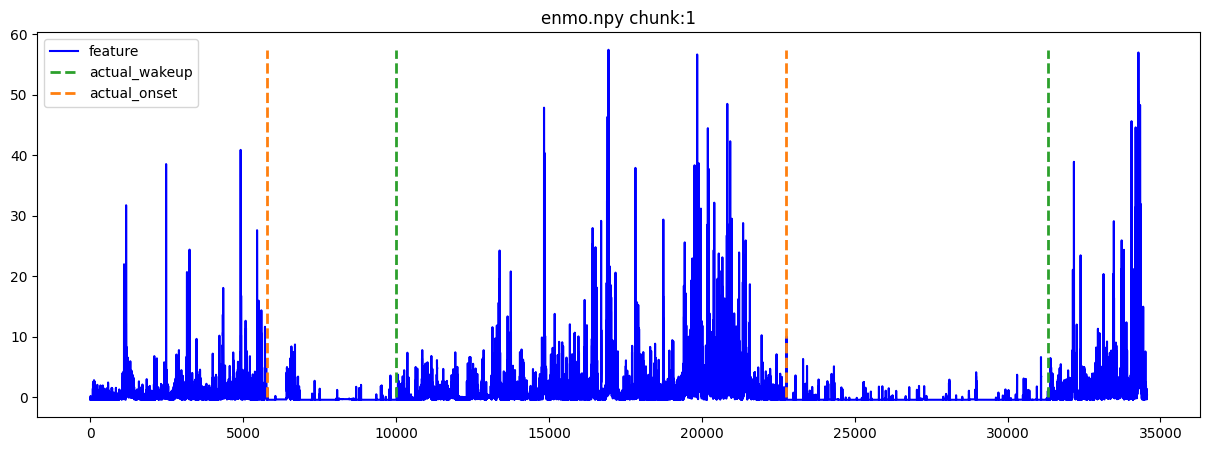

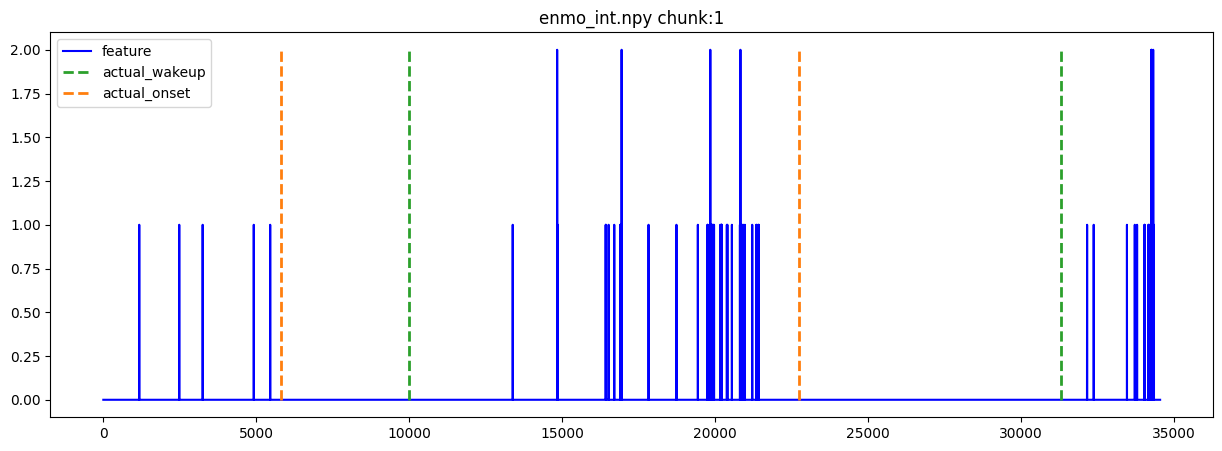

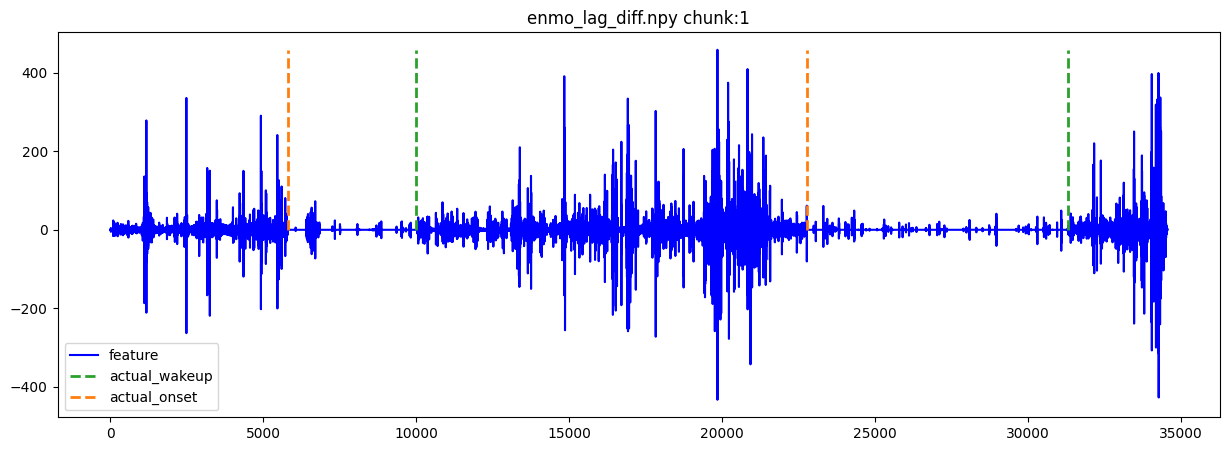

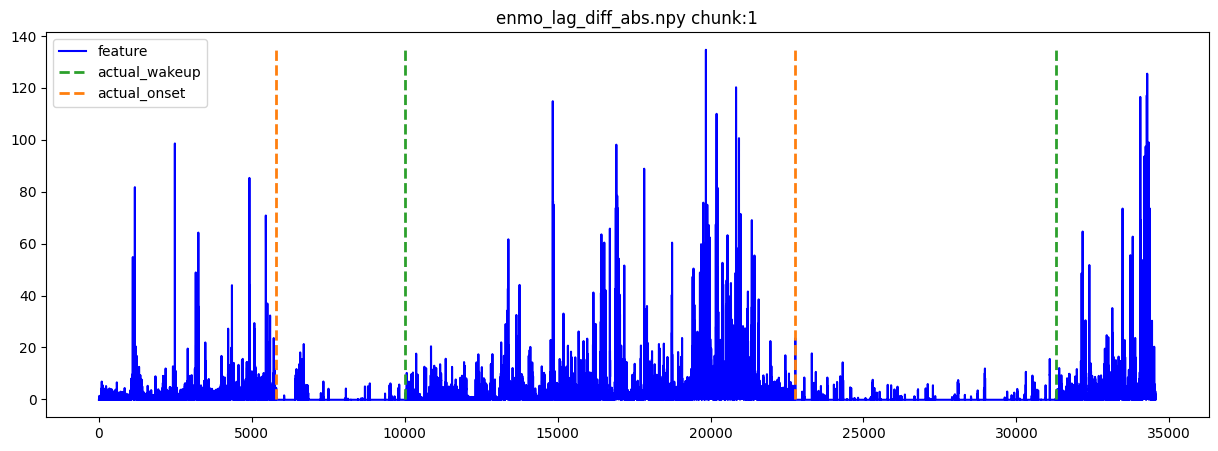

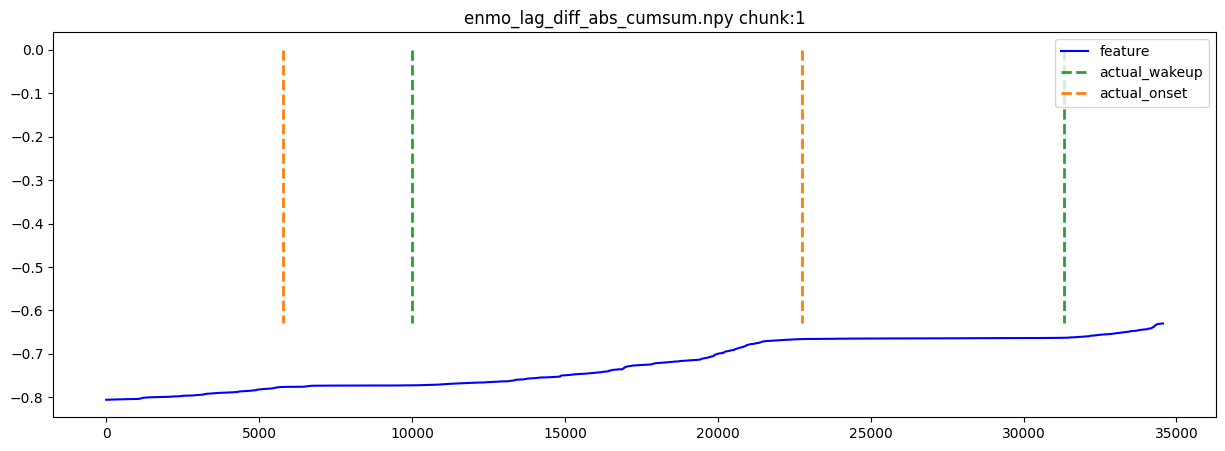

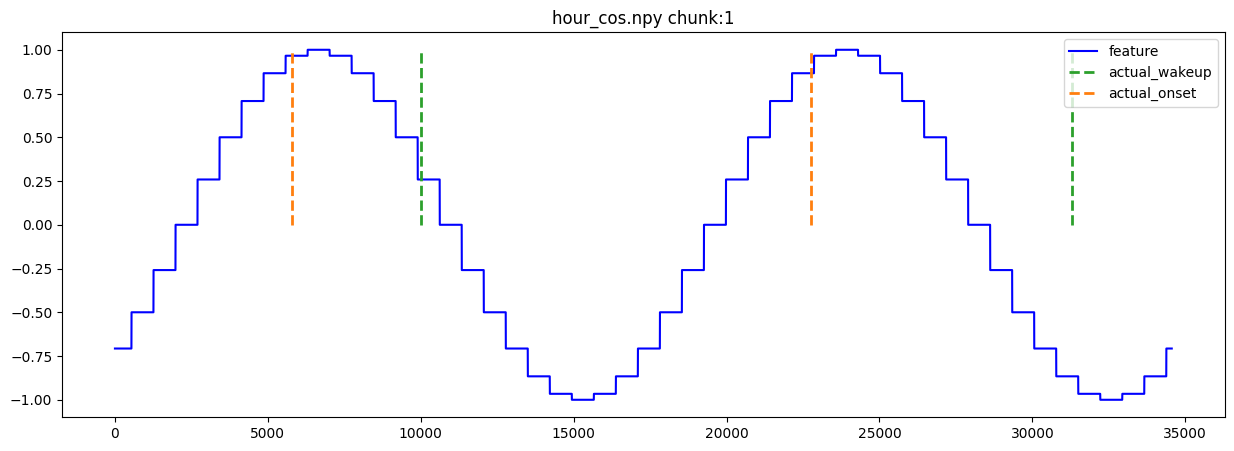

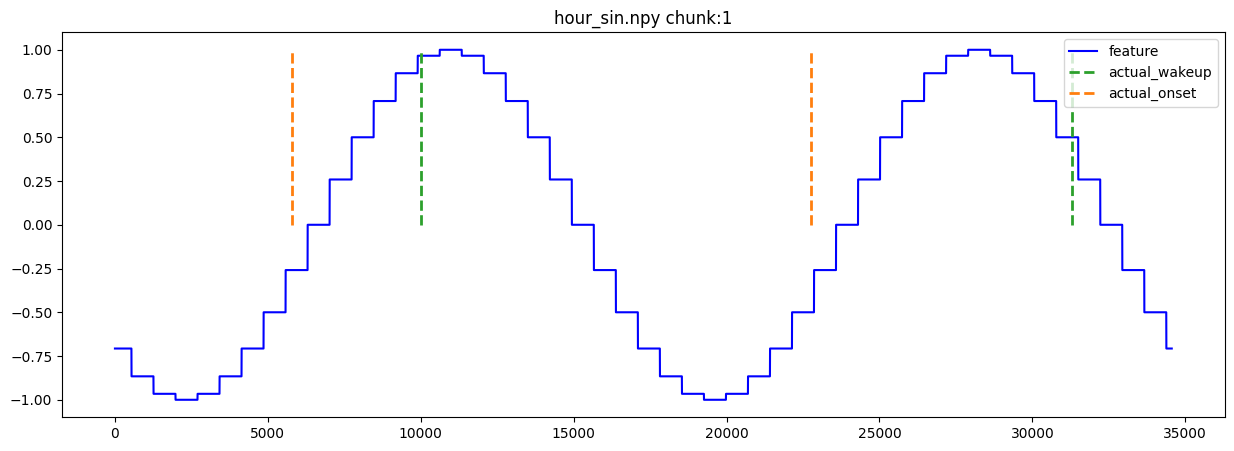

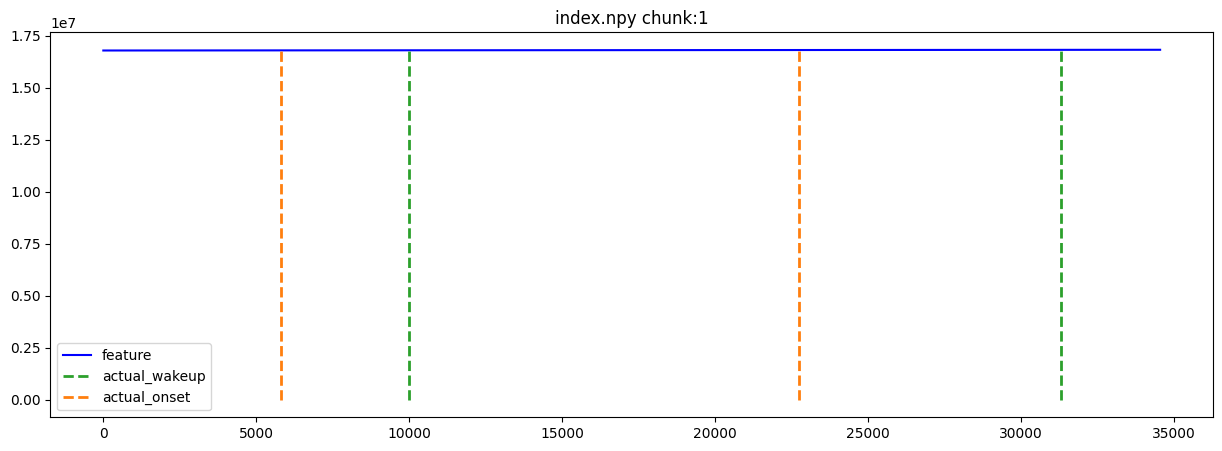

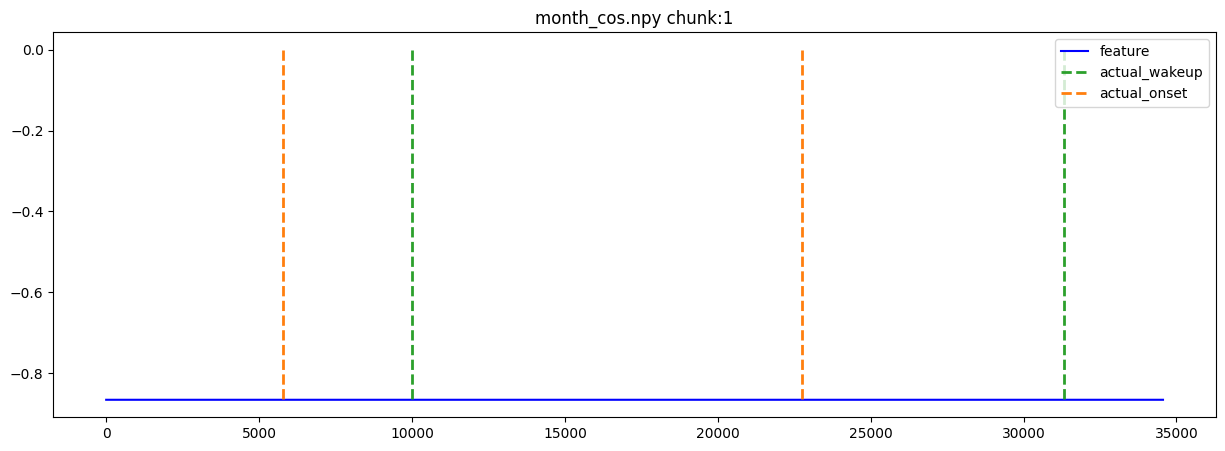

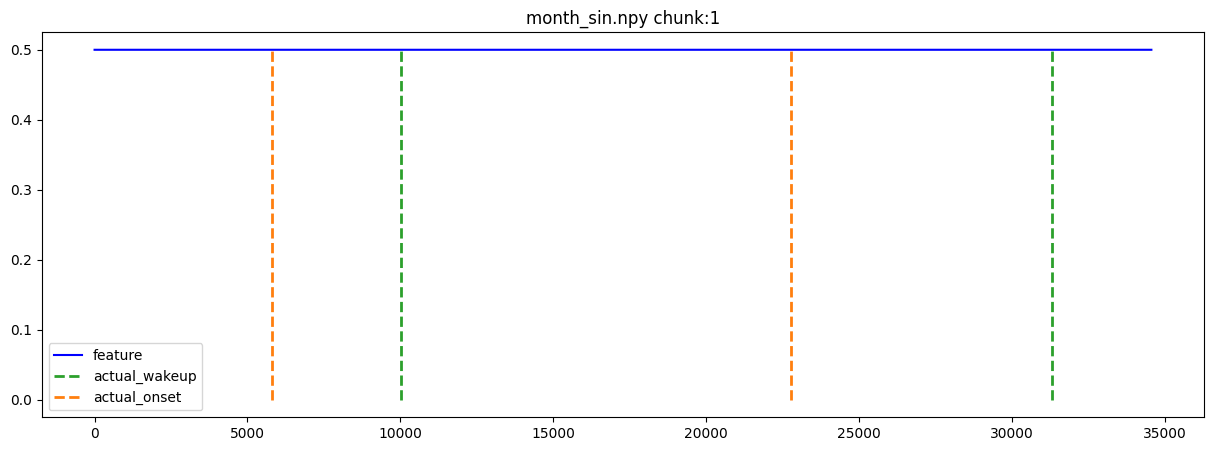

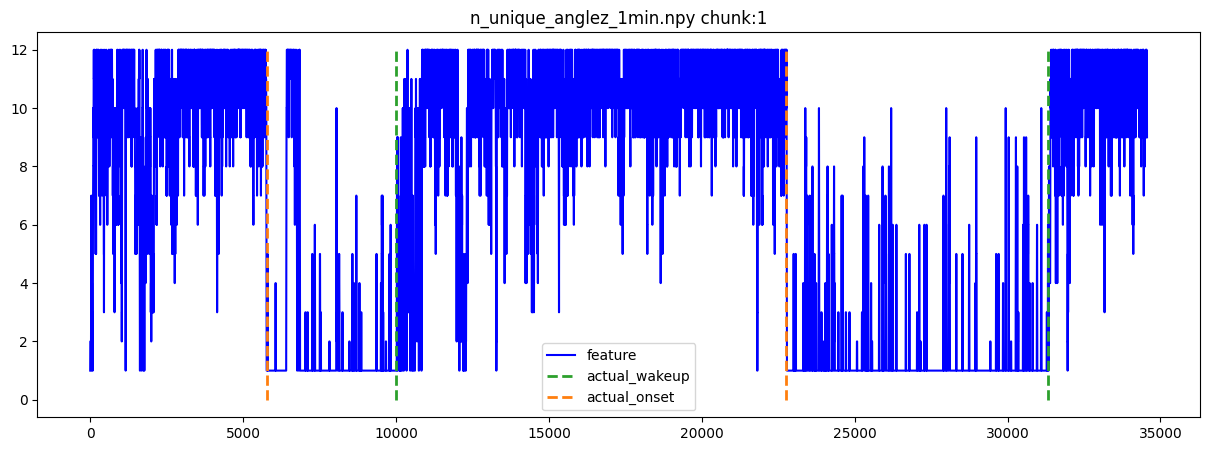

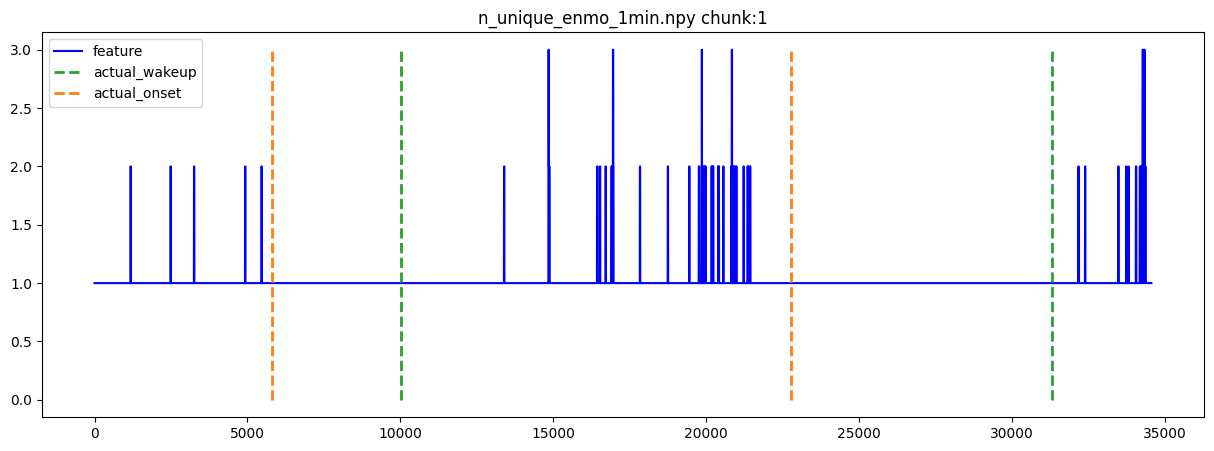

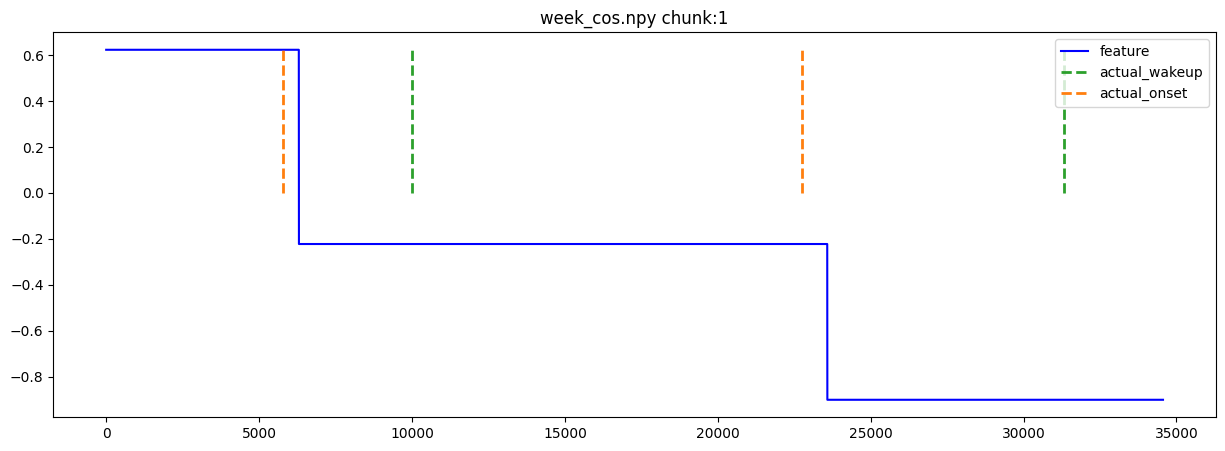

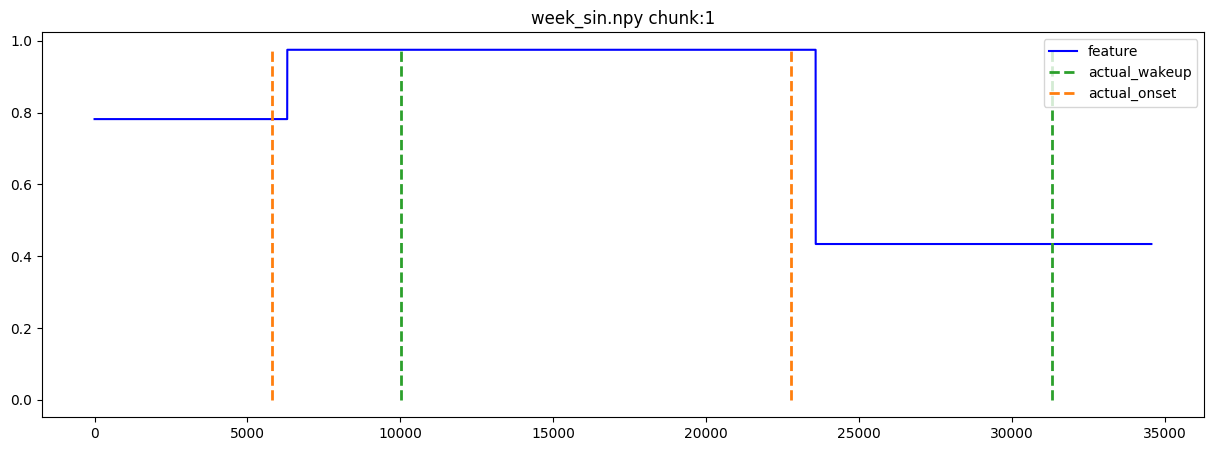

In [8]:
path_data = path_root / s_id

chunk_i = 1
duration = 17280*2
for path_file in sorted(path_data.iterdir()):
    file_name = path_file.name
    start = duration*(chunk_i-1)
    th = duration*chunk_i
    arr = np.load(path_file)[start:th]#.astype(np.float16)
    plt.figure(figsize =(15,5))
    plt.plot(arr,color = "blue",label="feature")
    plt.vlines(df_wakeup.query("step <= @th & @start <= step")["step"].values-start, 0, np.max(arr), label="actual_wakeup", linestyles="dashed", color="C2",linewidth=line_w)
    plt.vlines(df_onset.query("step <= @th & @start <= step")["step"].values-start, 0, np.max(arr), label="actual_onset", linestyles="dashed", color="C1",linewidth=line_w)
    plt.title(f"{file_name} chunk:{chunk_i}")
    plt.legend()
    plt.show()